## Step 4: a7 Feature Analysis
##### Use modules built for a2 (evolve if necessary)

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
sys.path.append('../utils')
import DataAggregation as da
import AlgoUtils as au
cmap_bold = ListedColormap(['#00FF00','#FF0000'])

In [2]:
dd = da.GetFrames("../data/device_failure.csv", "a7")

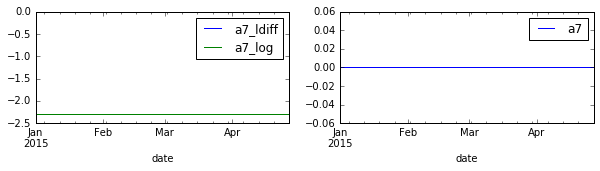

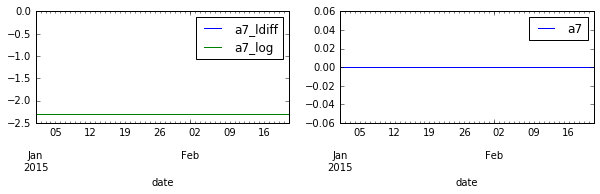

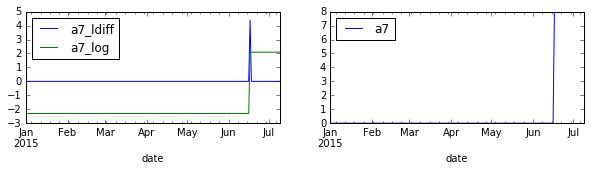

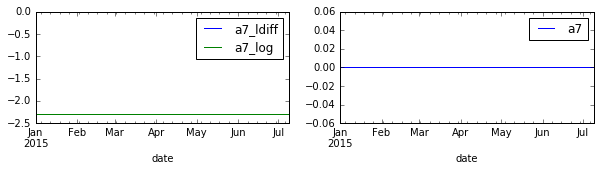

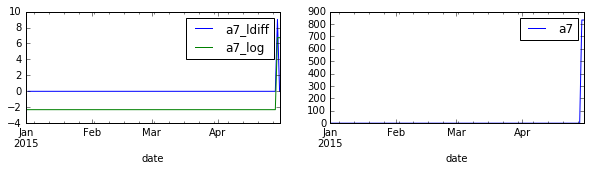

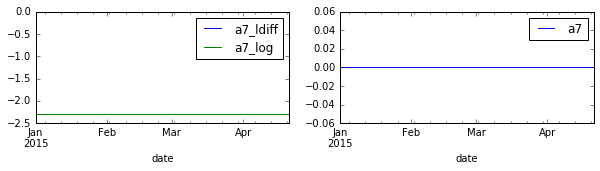

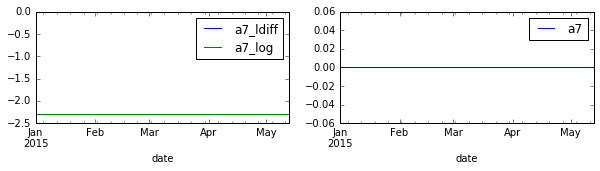

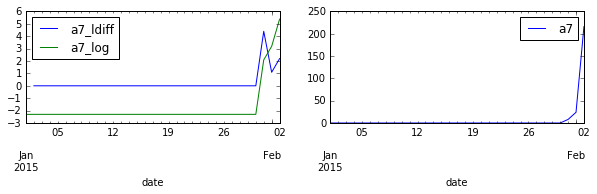

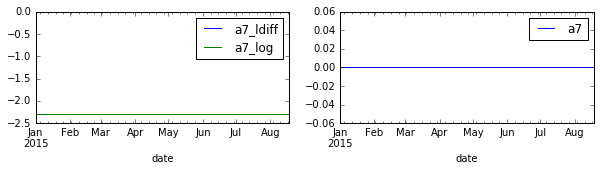

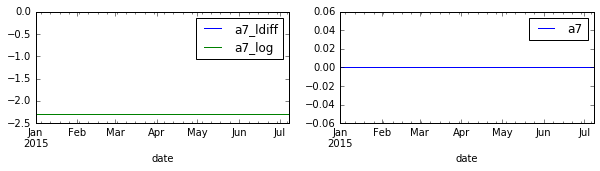

In [46]:
dd.plot_sample_history(dd.failed_devs["device"],10)

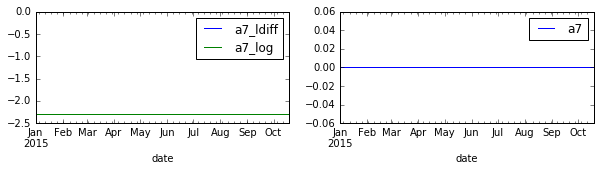

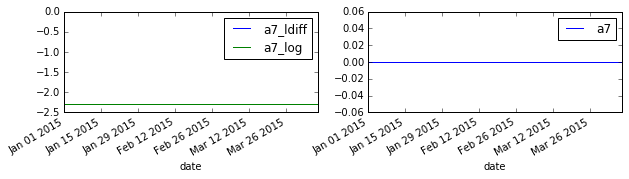

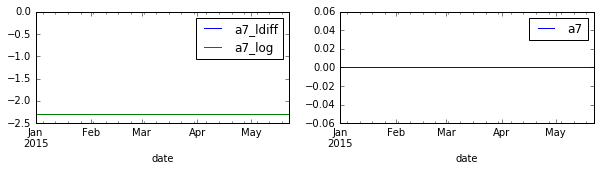

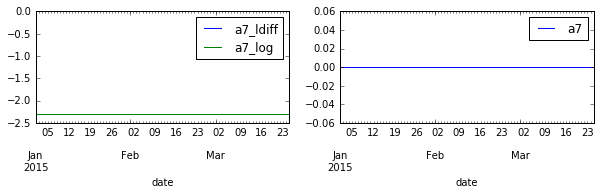

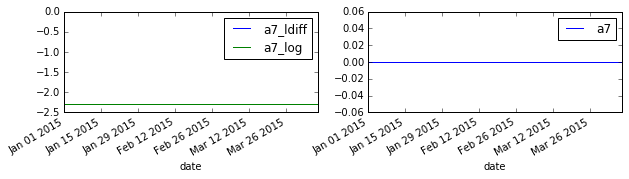

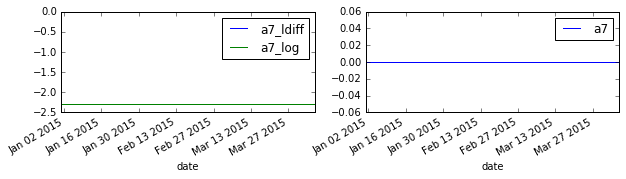

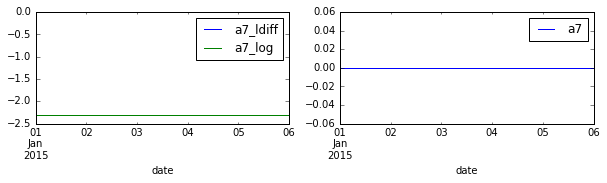

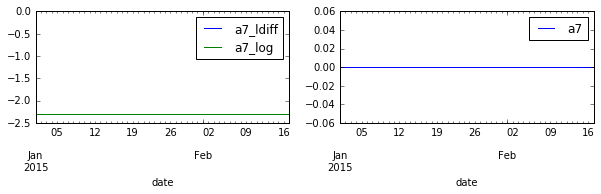

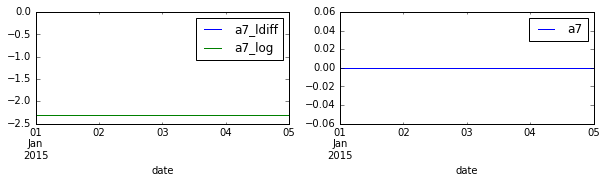

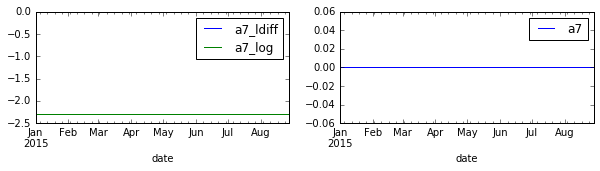

In [4]:
dd.plot_sample_history(dd.good_devs["device"],10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2499076f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2495746650>]], dtype=object)

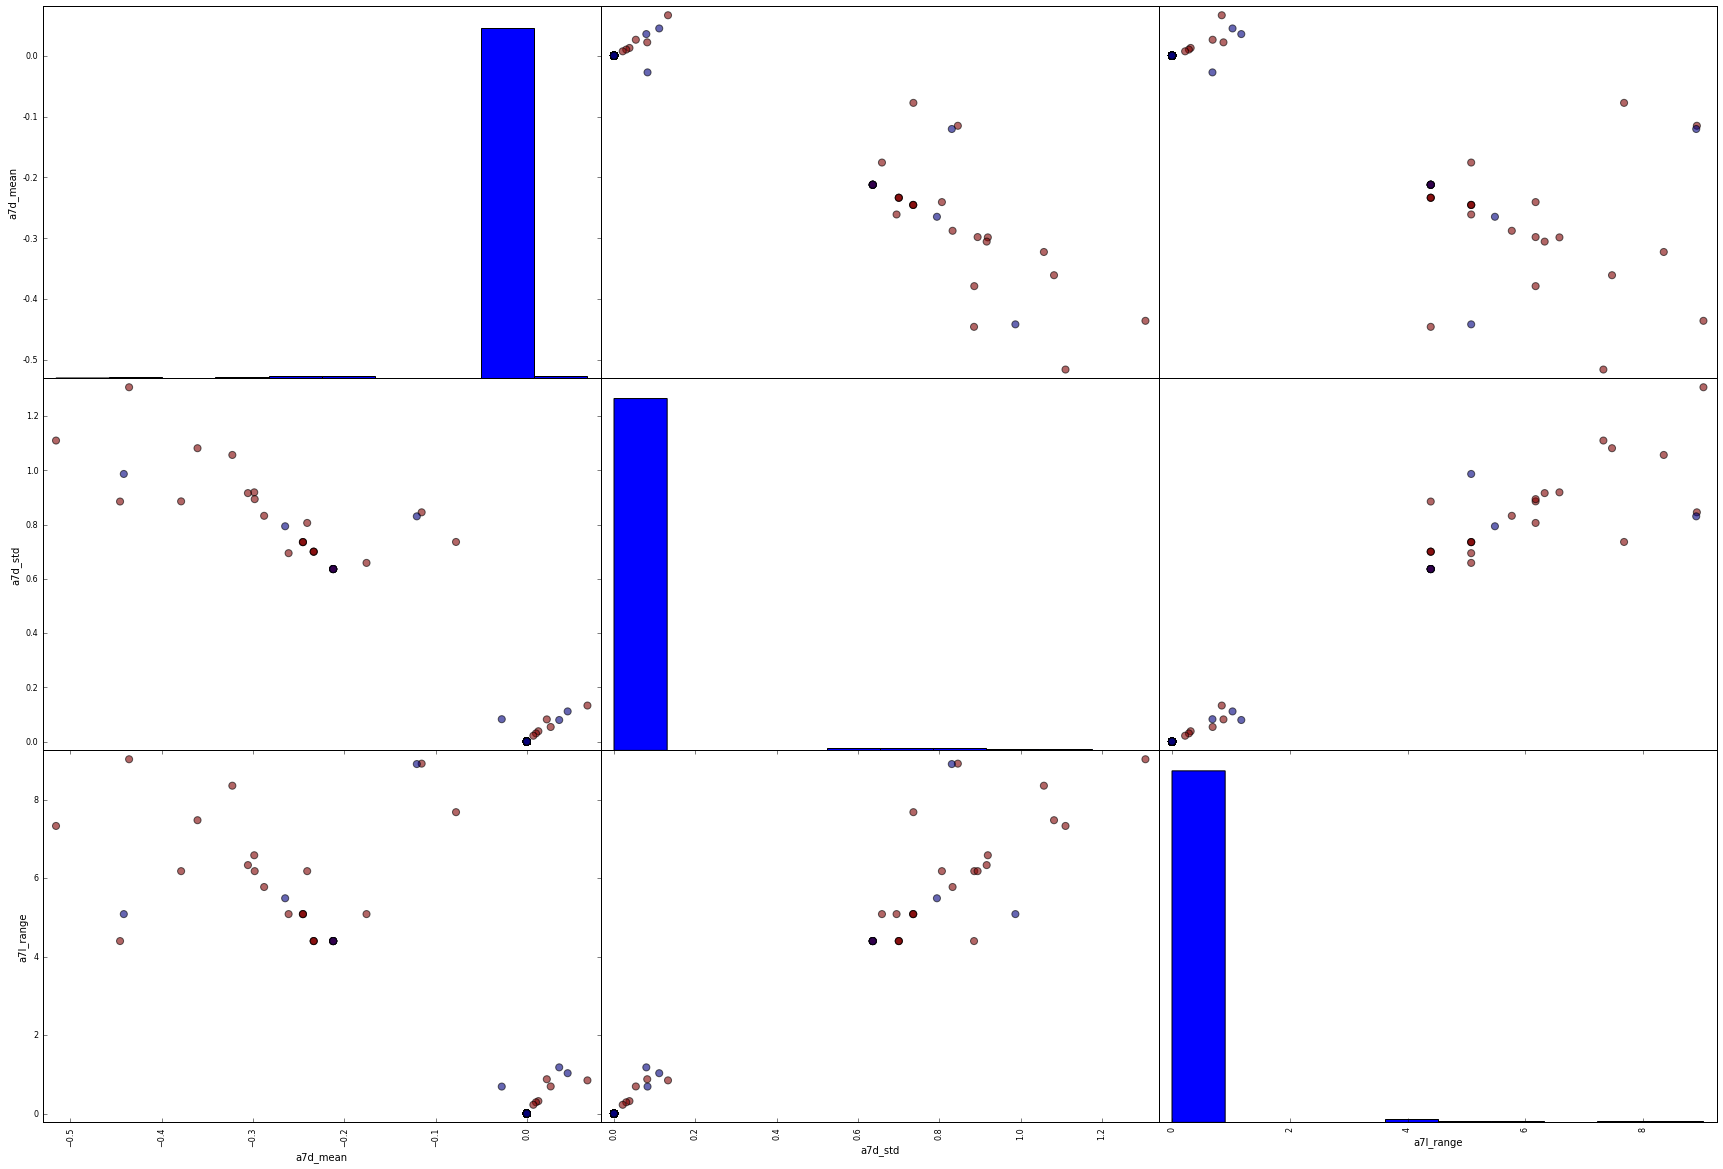

In [5]:
sfeature = dd.sfeature
fcols_tmp = [sfeature +"d_mean", sfeature +"d_std", sfeature +"l_range"]
df_sfeature = dd.df_sfeature
pd.scatter_matrix(df_sfeature[fcols_tmp], figsize=(30,20), s=200, c=df_sfeature["failure"], alpha=0.6)

#### Decent. See seperation between good and bad devices.

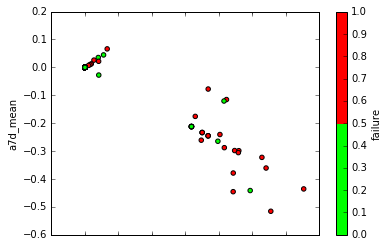

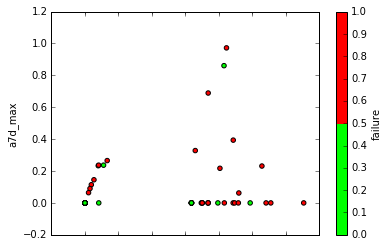

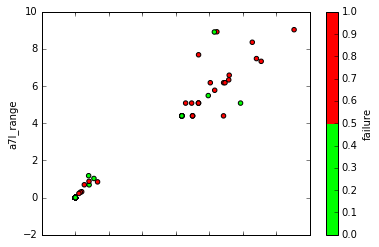

In [13]:
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"d_mean", c="failure", colormap=cmap_bold)
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"d_max", c="failure", colormap=cmap_bold)
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"l_range", c="failure", colormap=cmap_bold)

#### Do see seperation in good Vs bad
#### Unsure which algorithm will work best at this point

In [14]:
algos_dd = {
    "LogisticRegression": {"C": 1e9},
    "LogisticRegressionB": {"C": 1e9, "class_weight":'balanced'},
    "KNeighborsClassifier": {"n_neighbors": 7},
    "LinearDiscriminantAnalysis": {},
    "QuadraticDiscriminantAnalysis": {}
}

fcols = ["d_mean:d_std:d_max:l_range",
         "d_mean:d_std:l_range",
         "d_std:l_range",
         "l_range",
         "d_std",
         "d_max"]
algos_str = ["LogisticRegression", 
             "LogisticRegressionB", 
             "KNeighborsClassifier",
             "LinearDiscriminantAnalysis",
             "QuadraticDiscriminantAnalysis"]

In [15]:
df_sfeature = dd.df_sfeature
sfeature = dd.sfeature
df_results = au.run_algo_analysis(df_sfeature, sfeature, fcols, algos_str, algos_dd)

----------
LogisticRegression:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.65
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.24
Cross-val-score(precision)= 0.81
Cross-val-score(f1)       = 0.81
----------
LogisticRegressionB:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.66
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.31
Cross-val-score(precision)= 0.82
Cross-val-score(f1)       = 0.82
----------
KNeighborsClassifier:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.66
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.29
Cross-val-score(precision)= 0.80
Cross-val-score(f1)       = 0.80
----------
LinearDiscriminantAnalysis:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.66
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.26
Cross-val-score(precision)= 0.79
Cross-val-score(f1)       = 0.79
----------
QuadraticDiscriminantAnalysis:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.66
Cross

In [16]:
df_results

,fcols,algo,recall,precision,f1,roc_auc,accuracy
4,d_mean:d_std:d_max:l_range,QuadraticDiscriminantAnalysis,0.32,0.82,0.44,0.66,0.93
6,d_mean:d_std:l_range,LogisticRegressionB,0.32,0.82,0.44,0.66,0.93
9,d_mean:d_std:l_range,QuadraticDiscriminantAnalysis,0.32,0.82,0.44,0.66,0.93
1,d_mean:d_std:d_max:l_range,LogisticRegressionB,0.31,0.82,0.43,0.66,0.93
11,d_std:l_range,LogisticRegressionB,0.31,0.80,0.43,0.66,0.93
16,l_range,LogisticRegressionB,0.31,0.80,0.43,0.66,0.93
22,d_std,KNeighborsClassifier,0.30,0.80,0.42,0.66,0.93
2,d_mean:d_std:d_max:l_range,KNeighborsClassifier,0.29,0.80,0.41,0.66,0.93
7,d_mean:d_std:l_range,KNeighborsClassifier,0.29,0.80,0.41,0.66,0.93
12,d_std:l_range,KNeighborsClassifier,0.29,0.80,0.41,0.66,0.93


### Results look bit better than expected!
#### QuadraticDiscriminantAnalysis(QDA) again produces fairly precise results.

### Lets see why Recall(Sensitivity) is so low

In [19]:
sfeature = dd.sfeature
algo_str = "QuadraticDiscriminantAnalysis"
fcols = [sfeature + x for x in "d_mean:d_std:d_max:l_range".split(":")]

In [20]:
analysisdf = au.do_clf_validate(df_sfeature, algo_str,algos_dd[algo_str], fcols, "failure")

Accuracy = 0.96
Confusion Matrix
[[270   1]
 [ 12   9]]
recall_sensitivity = 0.43
precision          = 0.90
f1                 = 0.58


In [23]:
mispredictdf.head()

,index,a7d_mean,a7d_std,a7d_max,a7l_range,failure,y_pred
0,Z1F1VQFY,0,0,0,0,1,0
1,W1F0Z3KR,0,0,0,0,1,0
2,S1F0S4T6,0,0,0,0,1,0
3,Z1F0MRPJ,0,0,0,0,1,0
4,Z1F130LH,0,0,0,0,1,0


In [41]:
mispredictdf = analysisdf[analysisdf["failure"] != analysisdf["y_pred"]]
mispredictdf.reset_index(inplace=True)
mispredictdf.columns = ["device"] + list(mispredictdf.columns[1:])

In [42]:
mispredictdf

,device,a7d_mean,a7d_std,a7d_max,a7l_range,failure,y_pred
0,Z1F1VQFY,0.000000,0.000000,0.000000,0.000000,1,0
1,W1F0Z3KR,0.000000,0.000000,0.000000,0.000000,1,0
2,S1F0S4T6,0.000000,0.000000,0.000000,0.000000,1,0
3,Z1F0MRPJ,0.000000,0.000000,0.000000,0.000000,1,0
4,Z1F130LH,0.000000,0.000000,0.000000,0.000000,1,0
5,S1F0PJJW,0.000000,0.000000,0.000000,0.000000,1,0
6,Z1F0P5D9,0.000000,0.000000,0.000000,0.000000,1,0
7,W1F1B0KF,-0.120476,0.830599,0.860881,8.903951,0,1
8,S1F0JD7P,0.000000,0.000000,0.000000,0.000000,1,0
9,S1F10E6M,0.000000,0.000000,0.000000,0.000000,1,0


In [43]:
mispredict_devs = pd.DataFrame(mispredictdf.device.unique())
mispredict_devs.columns = ["device"]

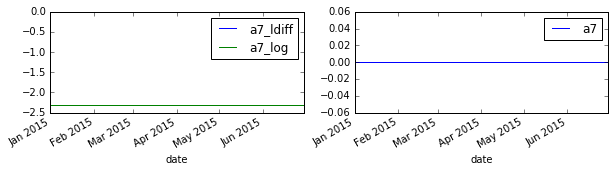

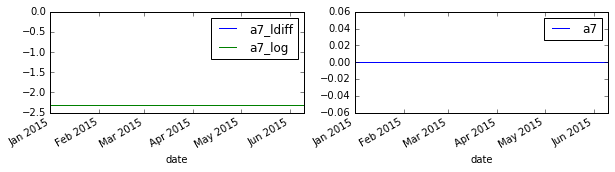

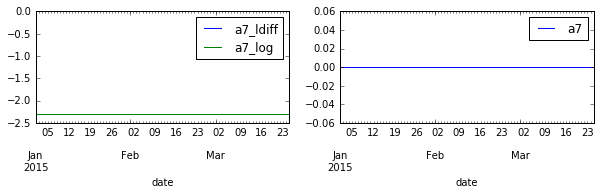

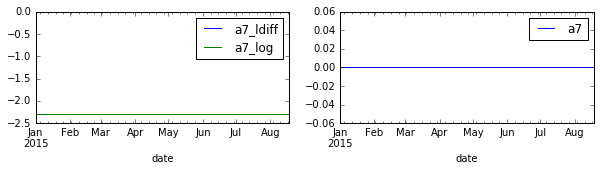

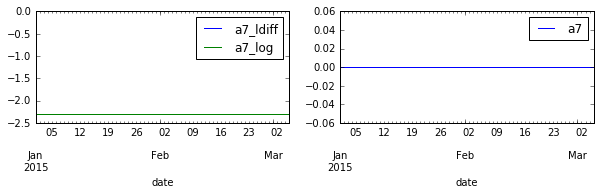

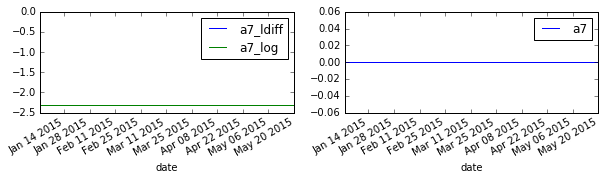

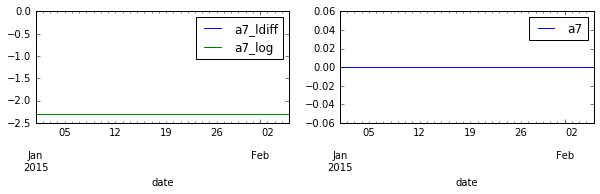

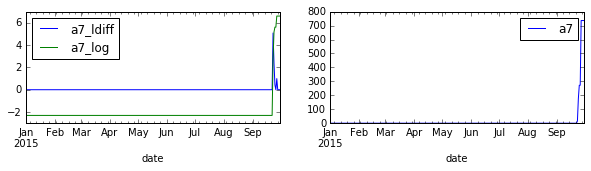

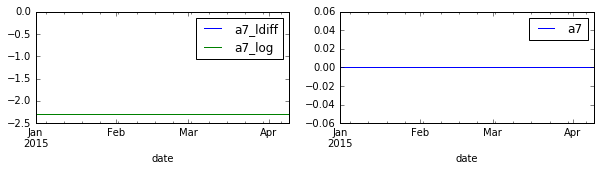

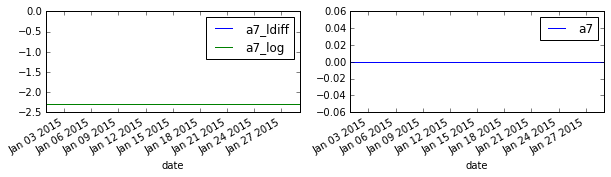

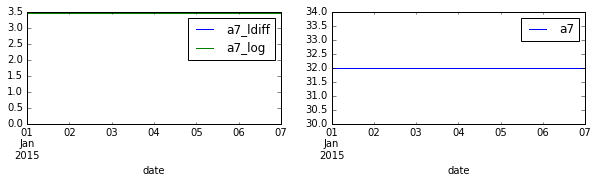

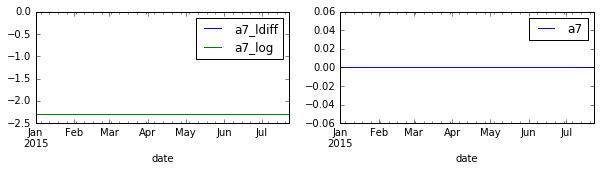

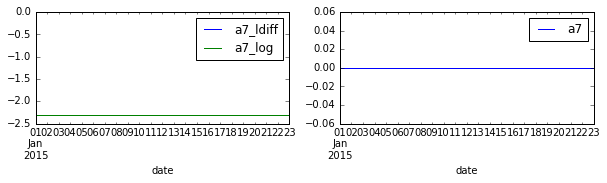

In [44]:
dd.plot_sample_history(mispredict_devs["device"],0)

## Summary
### Results for a7 look even better than a2! Better precision.
### Take even False Positives seriously!
### Reason recall rate is very low is because there is just no signal in a7 for these failed cases. Need to look for other features for failures